In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# train_set ##
train_set = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\dataset\\training.csv')

# question
question = pd.read_csv(r'C:\\Users\\kfps86\\Downloads\\dataset\\question_metadata.csv')

# change SubjectId to list format
question['SubjectId'] = question['SubjectId'].str.strip('[]').str.split(',')

question = question.merge(train_set[['QuestionId', 'IsCorrect']], how='inner', on=['QuestionId'])

question.head()

,QuestionId,SubjectId,IsCorrect
0,13090,"[3, 32, 71, 77, 141, 185, 186, 214]",1
1,13090,"[3, 32, 71, 77, 141, 185, 186, 214]",1
2,13090,"[3, 32, 71, 77, 141, 185, 186, 214]",1
3,13090,"[3, 32, 71, 77, 141, 185, 186, 214]",1
4,13090,"[3, 32, 71, 77, 141, 185, 186, 214]",0


In [7]:
del train_set

In [8]:
question.drop(['QuestionId'], axis=1, inplace=True)
question.head()

,SubjectId,IsCorrect
0,"[3, 32, 71, 77, 141, 185, 186, 214]",1
1,"[3, 32, 71, 77, 141, 185, 186, 214]",1
2,"[3, 32, 71, 77, 141, 185, 186, 214]",1
3,"[3, 32, 71, 77, 141, 185, 186, 214]",1
4,"[3, 32, 71, 77, 141, 185, 186, 214]",0


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

# https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
# create a one hot encoding column for each category
# uses up a lot of RAM though
mlb = MultiLabelBinarizer(sparse_output=True)

question = question.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(question.pop('SubjectId')),
                index=question.index,
                columns=mlb.classes_))

question.head()

,IsCorrect,100,101,102,103,104,105,1059,106,107,...,91,92,93,94,95,96,97,98,99,3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
question.head()

,IsCorrect,100,101,102,103,104,105,1059,106,107,...,91,92,93,94,95,96,97,98,99,3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
q1 = question.iloc[:,:40]
q2 = pd.concat([question.iloc[:,40:80], question.iloc[:,:1]], axis=1)
q3 = pd.concat([question.iloc[:,80:120], question.iloc[:,:1]], axis=1)
q4 = pd.concat([question.iloc[:,120:160], question.iloc[:,:1]], axis=1)
q5 = pd.concat([question.iloc[:,160:200], question.iloc[:,:1]], axis=1)
q6 = pd.concat([question.iloc[:,200:240], question.iloc[:,:1]], axis=1)
q7 = pd.concat([question.iloc[:,240:280], question.iloc[:,:1]], axis=1)
q8 = pd.concat([question.iloc[:,280:320], question.iloc[:,:1]], axis=1)
q9 = pd.concat([question.iloc[:,320:360], question.iloc[:,:1]], axis=1)
q10 = pd.concat([question.iloc[:,360:], question.iloc[:,:1]], axis=1)

In [21]:
corr1 = q1.corr()
corr2 = q2.corr()
corr3 = q3.corr()
corr4 = q4.corr()
corr5 = q5.corr()
corr6 = q6.corr()
corr7 = q7.corr()
corr8 = q8.corr()
corr9 = q9.corr()
corr10 = q10.corr()

In [37]:
corr = pd.concat([corr1['IsCorrect'], corr2['IsCorrect'], corr3['IsCorrect'],
                 corr4['IsCorrect'], corr5['IsCorrect'], corr6['IsCorrect'],
                 corr7['IsCorrect'], corr8['IsCorrect'], corr9['IsCorrect'],
                 corr10['IsCorrect']])

corr.abs().sort_values(ascending=False).iloc[10:].head(20)

 144     0.058142
 32      0.050073
 202     0.038072
 49      0.035604
 203     0.029685
 204     0.028532
 54      0.026527
 71      0.022666
 100     0.021430
 55      0.021308
 260     0.019687
 58      0.019657
 62      0.018657
 1647    0.017751
 200     0.017748
 278     0.017284
 70      0.016971
 36      0.016917
 184     0.016011
 34      0.015810
Name: IsCorrect, dtype: float64

In [39]:
q = question[[' 144', ' 32', ' 202', ' 49', ' 203', ' 204',
             ' 54', ' 71', ' 100', ' 55', ' 260', ' 58',
             ' 62', ' 1647', ' 200', ' 278', ' 70', ' 36',
             ' 184', ' 34', 'IsCorrect']]

q.head()

,144,32,202,49,203,204,54,71,100,55,...,58,62,1647,200,278,70,36,184,34,IsCorrect
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
corr = q.corr()

<AxesSubplot:>

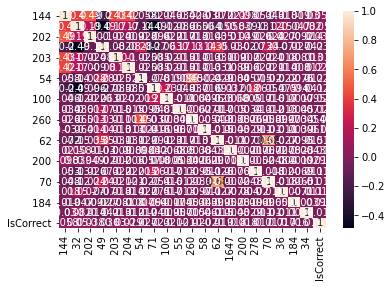

In [42]:
sns.heatmap(corr,annot=True)

Below are the subjects which are being added into the main dataframe
the 20 with the highest correlation to 'IsCorrect'
20 was chosen due to memory concerns / feasibility time etc

q = question[[' 144', ' 32', ' 202', ' 49', ' 203', ' 204',
             ' 54', ' 71', ' 100', ' 55', ' 260', ' 58',
             ' 62', ' 1647', ' 200', ' 278', ' 70', ' 36',
             ' 184', ' 34', 'IsCorrect']]